In [2]:
import xml.etree.ElementTree as ET
from collections import defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load and parse the XML file (test)
in_path = "/home/ec2-user/SageMaker/mapping/hubmap-data/hubmap-data/Disease_Data/hubmap-data/Disease_Data/"
in_sample = "S-1903-005465_PAS_2of2"
in_csv = os.path.join(in_path, f"{in_sample}_glomeruli-objects.csv")

In [5]:
# Load CSV File
df = pd.read_csv(in_csv)

# Is_sclerotic 컬럼에서 0과 1의 개수 계산
counts = df["Is_sclerotic"].value_counts()

# 0값과 1값의 개수 가져오기
num_zeros = counts.get(0, 0)
num_ones = counts.get(1, 0)

# 비율 계산 (0값 개수 / 1값 개수)
ratio = num_zeros / num_ones if num_ones != 0 else None

print(f"#0: {num_zeros}")
print(f"#1: {num_ones}")
print(f"Ratio (0 / 1): {ratio}")

#0: 13
#1: 1
Ratio (0 / 1): 13.0


In [12]:
import glob
# 폴더 내 *_glomeruli-objects.csv 파일 찾기
csv_files = glob.glob(os.path.join(in_path, "*_glomeruli-objects.csv"))

# 결과 저장용 딕셔너리
ratios = {}
for file in csv_files:
    # 파일에서 샘플명 추출 (예: S-1903-005465_PAS_2of2_glomeruli-objects.csv → S-1903-005465_PAS_2of2)
    sample_name = os.path.basename(file).replace("_glomeruli-objects.csv", "")

    # CSV 파일 읽기
    df = pd.read_csv(file)

    # Is_sclerotic 컬럼에서 0과 1의 개수 계산
    counts = df["Is_sclerotic"].value_counts()
    num_zeros = counts.get(0, 0)
    num_ones = counts.get(1, 0)

    # 비율 계산 (0값 개수 / 1값 개수)
    ratio = num_zeros / num_ones if num_ones != 0 else None

    # 결과 저장
    ratios[sample_name] = ratio

# 결과 출력
for sample, ratio in ratios.items():
    print(f"{sample}: {ratio}")



S-1908-010113_PAS_1of2: 8.0
S-1908-009830_PAS_2of2: 21.0
S-2006-004858_PAS_2of2: 1.125
S-2102-003404_PAS_2of2: 6.0
S-2101-003189_PAS_2of2: 7.0
S-1910-000137_PAS_1of2: 4.2
S-2006-002486_PAS_1of1: 8.0
S-1905-017549_PAS_2of2: 6.0
S-1908-009687_PAS_2of2: 11.0
S-2101-000935_PAS_2of2: 4.0
S-2006-002045_PAS_1of2: 10.0
S-2102-006222_PAS_2of2: 1.6666666666666667
S-2102-006269_PAS_2of2: 8.0
S-2002-007648_PAS_2of2: 6.25
S-1904-007292_PAS_2of2: 9.0
S-2002-007507_PAS_2of2: 9.0
S-2002-007601_PAS_2of2: 1.0
S-2102-006504_PAS_2of2: 4.25
S-2008-000354_PAS_1of2: 10.0
S-1908-009878_PAS_1of3: 5.0
S-1908-010065_PAS_2of2: 14.0
S-1903-005466_PAS_1of2: 16.0
S-1908-000604_PAS_2of3: 4.0
S-2101-000888_PAS_2of2: 6.5
S-2006-002185_PAS_2of2: 1.0
S-2001-019412_PAS_2of2: 2.6
S-2001-019413_PAS_1of2: 4.333333333333333
S-2006-002113_PAS_3of3: 11.0
S-2106-003788_PAS_2of2: 2.3333333333333335
S-2002-005611_PAS_2of2: 1.2380952380952381
S-2002-014469_PAS_2of2: 9.0
S-1908-009831_PAS_1of2: 4.5
S-1910-000042_PAS_2of2: 5.0
S-2006

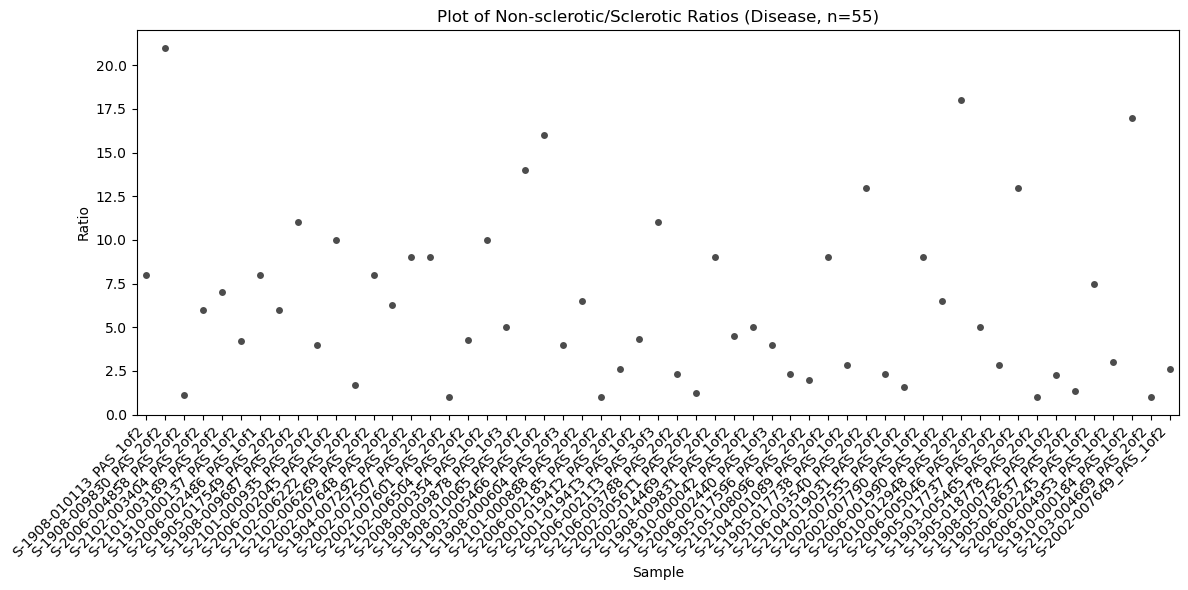

In [13]:
import seaborn as sns
# ratios 딕셔너리를 DataFrame으로 변환
ratio_df = pd.DataFrame(list(ratios.items()), columns=['Sample', 'Ratio'])

# 'None' 값이 있는 행 제거
ratio_df = ratio_df.dropna()

ratio_df.to_csv("output_ratios.disease.csv")
# Jitter plot 생성
plt.figure(figsize=(12, 6))  # x축 폭을 넓게 설정
sns.stripplot(x='Sample', y='Ratio', data=ratio_df, jitter=True, color='black', alpha=0.7)

# 그래프 설정
plt.title('Plot of Non-sclerotic/Sclerotic Ratios (Disease, n={})'.format(len(ratio_df)))
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')  # x축 레이블 기울이기
plt.tight_layout()

# 그래프 출력
plt.show()